#### 1. Теперь решаем задачу регрессии - предскажем цены на недвижимость. 
Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('house-prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.dtypes.index

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Воспользуемся идеей обработки категориальных фичей из примера с занятия
cat_feat = list(df.dtypes[df.dtypes == object].index)
df[cat_feat] = df[cat_feat].fillna('nan')

#отфильтруем непрерывные признаки
num_feat = [f for f in df if f not in (cat_feat + ['Id', 'SalePrice'])]

# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = df[cat_feat].nunique()
print(cat_nunique)

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64


Максимальное количество уникальных категориальных значений у парамера Neighborhood получилось 25, что не так уж и много. Не будем их ограничивать, по всем сделаем OneHotEncoding

In [5]:
df_dummy = pd.get_dummies(df[cat_feat], columns=cat_feat)
X = pd.concat([df[num_feat].fillna(-999), df_dummy], axis=1)
y = df['SalePrice']

In [6]:
# проверим, нет ли пропусков данных
print(sum(X.isna().sum()))

0


#### 2. Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [8]:
clf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=777)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)                                              

[0.81963369 0.84641    0.89460111 0.76007846 0.83980106 0.84335232
 0.83419609 0.83279124 0.76252626 0.82931299]


In [9]:
print("R2: {} (+/- {})".format(round(scores.mean(),3), round(scores.std() * 2, 3)))

R2: 0.826 (+/- 0.075)


#### 3. Построить случайный лес, вывести важность признаков

In [10]:
clf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=777, verbose=0, warm_start=False)

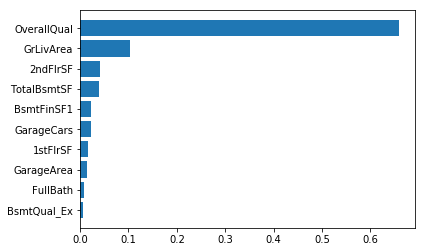

In [11]:
full_importances = sorted(zip(X.columns, clf.feature_importances_), key=lambda x :x[1] , reverse=True)[:10]
col_names, importances = [], []
for full in full_importances:
    col_names.insert(0, full[0])
    importances.insert(0, full[1])
plt.barh(np.arange(len(importances[:10])), importances[:10])
plt.yticks([i for i in range(10)], col_names);

Признак OverallQual: Overall material and finish quality - самый важный, что похоже на правду

#### 4. Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

Для примера возьмем линейную регрессию, случайный лес и беггинг  

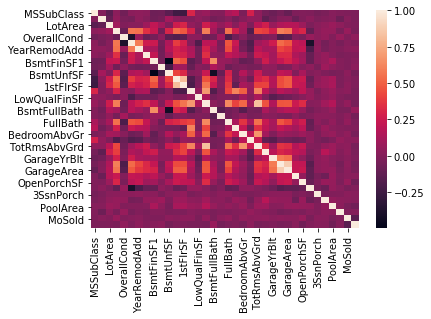

In [12]:
sns.heatmap(X[num_feat].corr())

4 фичи - TotalBsmtSf/1stFlrSF и GarageCars/GarageArea - попарно коррелированы между собой  
Посмотрим на них поподробнее:  
TotalBsmtSF: Total square feet of basement area  
1stFlrSF: First Floor square feet  
и  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  

Уберем 1stFlrSF и GarageCars

In [13]:
num_feat_lin = list(filter(lambda x : x not in ['1stFlrSF', 'GarageCars'], num_feat)) 
print('Количество численных фичей : {}'.format(len(num_feat_lin)))
cat_feat = list(filter(lambda x : x not in num_feat, X))
print('Количество категориальных фичей : {}'.format(len(cat_feat)))

Количество численных фичей : 34
Количество категориальных фичей : 268


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

clf_lr = LinearRegression()
scaler = StandardScaler()
scaler.fit(X_train[num_feat_lin])

X_train_lin = scaler.transform(X_train[num_feat_lin])
X_train_lin = pd.DataFrame(X_train_lin, columns=num_feat_lin)
#X_train_lin2 = pd.concat([X_train_lin, X_train[cat_feat]], axis=1)

X_test_lin = scaler.transform(X_test[num_feat_lin])
X_test_lin = pd.DataFrame(X_test_lin, columns=num_feat_lin)
#X_test_lin2 = pd.concat([X_test_lin, X_test[cat_feat]], axis=1)

In [16]:
clf_lr.fit(X_train_lin, y_train)
y_test_pred = clf_lr.predict(X_test_lin)
print('Качество линейной регрессии : {}'.format(r2_score(y_test_pred, y_test)))

Качество линейной регрессии : 0.714291434520291


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

clf_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, random_state=100)
clf_tree.fit(X_train_lin, y_train)

clf_bag = BaggingRegressor(n_estimators=100, base_estimator=clf_tree, n_jobs=-1, random_state=200)
clf_bag.fit(X_train_lin, y_train)
y_test_pred = clf_bag.predict(X_test_lin)
print('Качество бэггинга : {}'.format(r2_score(y_test_pred, y_test)))

Качество бэггинга : 0.685004044900444


In [18]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    #print(meta_train.shape, meta_test.shape)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[train_ind] = clf.predict(X_train.iloc[train_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

In [19]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=42)

meta_train = []
meta_test = []
col_names = []

models = [clf, clf_lr, clf_bag] 
labels = ['Подготовим данные по случайному лесу', 
          'Подготовим данные по линейной регрессии', 
          'Подготовим данные по беггингу']

for label_model in zip(labels, models):
    print(label_model[0])
    meta_tr, meta_te = get_meta_features(clf_lr, X_train_lin, y_train, X_test_lin, stack_cv)
    meta_train.append(meta_tr)
    meta_test.append(meta_te)
    col_names.append(label_model[1].__class__.__name__)

Подготовим данные по случайному лесу
Подготовим данные по линейной регрессии
Подготовим данные по беггингу


In [20]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

#### 5. Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии
Используем случайный лес

In [21]:
final_clf = RandomForestRegressor(n_estimators=1000, max_depth=3, random_state=100)
final_clf.fit(X_meta_train, y_train)

y_final_pred = final_clf.predict(X_meta_test)
round(r2_score(y_final_pred, y_test), 3)

0.808

#### 6. Показать, что использование ансамблей моделей действительно улучшает качество (стекинг vs другие модели сравнивать на hold-out)

In [23]:
models = [clf, clf_lr, clf_bag] 
for model in models: 
    model.fit(X_train_lin, y_train)
    y_pred_test = model.predict(X_test_lin)
    print('Для модели {} значение R2 : {}'.format(model.__class__.__name__, 
                                                  round(r2_score(y_pred_test, y_test), 3)))
    
print()
print('Финальное качество модели 2го уровня получилось : {}'.format(round(r2_score(y_final_pred, y_test), 3)))

Для модели RandomForestRegressor значение R2 : 0.645
Для модели LinearRegression значение R2 : 0.714
Для модели BaggingRegressor значение R2 : 0.685

Финальное качество модели 2го уровня получилось : 0.808
